In [ ]:
# Load necessary libraries
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# **Load all Classification models**

- Load the saved models from the Google Drive

In [ ]:
# Allow google colab to access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This is the first layer model which is used to recognise the digit of the input image
digit_recognition_model = load_model(os.path.join('drive/MyDrive/AI/models', 'digit_recognition_model.h5'))

In [ ]:
# Load handwriting recognition model
# The 10 models are stored in a list
# The corresponding model will only be called based on the digit recognition model above
handwriting_model_list = []

for i in range(10):
  curr_model = load_model(os.path.join('drive/MyDrive/AI/models', f'handwriting_{i}_recognition_model.h5'))
  handwriting_model_list.append(curr_model)

# **Load Testing Dataset**

- Load the 50 samples unseen images from drive to evaluate the performance of two-step CNN models

In [ ]:
testing_dir = 'drive/MyDrive/AI/test_set_with_labels'
member_list = ['CY', 'YJ', 'YO', 'HT', 'ZY']

testing_files = []
filename_list = []

for i in range(10):
  temp = []
  filename_temp = []
  curr_dir = f'{testing_dir}/{i}'
  for filename in os.listdir(curr_dir):
    # Check if the file has an image extension
    if filename.endswith('.png'):
        # Create the full file path
        file_path = os.path.join(curr_dir, filename)
        # Append the file path to the list
        temp.append(file_path)
        filename_temp.append(filename)

  testing_files.append(temp)
  filename_list.append(filename_temp)

print(testing_files)
print(filename_list)
print(len(testing_files))

loaded_images = []

for i in range(len(testing_files)):
    temp = []
    # fig, axes = plt.subplots(1, 5)

    # Display each image in a separate subplot
    for j in range(len(testing_files[i])):
        print(filename_list[i][j])
        img = cv2.imread(testing_files[i][j])
        temp.append(img)
        # Display the image on the subplot
        # axes[j].imshow(img)

        # Remove the axis labels for each subplot
        # axes[j].axis('off')

    loaded_images.append(temp)
    # Adjust the spacing between subplots
    # plt.tight_layout()

    # Show the figure
    # plt.show()

[['drive/MyDrive/AI/test_set_with_labels/0/YO_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/HT_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/ZY_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/CY_0_resized.png', 'drive/MyDrive/AI/test_set_with_labels/0/YJ_0_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/1/HT_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/YO_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/YJ_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/CY_1_resized.png', 'drive/MyDrive/AI/test_set_with_labels/1/ZY_1_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/2/YO_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/YJ_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/HT_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/CY_2_resized.png', 'drive/MyDrive/AI/test_set_with_labels/2/ZY_2_resized.png'], ['drive/MyDrive/AI/test_set_with_labels/3/YJ_3_resized.png', 'drive/MyDrive/AI/test_set_with_

# **Predict the Digit of the Testing Dataset**

This is the first step of the model pipeline. All the testing dataset will be fed to Digit Recognition Model to predict the digits wrote by the members.

The result will act as the guidance on which CNN model that the digit should be fed to.

In [ ]:
# The predicted digits are stored in a list
pred_res = []

for i in range(len(loaded_images)):
  print(f'iteration: {i}')
  temp = []
  for j in range(len(loaded_images[i])):
    y_pred = digit_recognition_model.predict(np.expand_dims(loaded_images[i][j]/255, 0))
    y_pred_classes = tf.argmax(y_pred, axis=1)
    print(y_pred)
    print(y_pred_classes)
    temp.append(int(y_pred_classes))
  pred_res.append(temp)

print(pred_res)

accuracy_count = 0

for i in range(10):
  for j in range(5):
    if i == pred_res[i][j]:
      accuracy_count+=1

print(f'Accuracy: {accuracy_count/50*100}%')

iteration: 0
1/1 [==============================] - 0s 341ms/step
[[9.9984372e-01 3.1197359e-16 2.0487664e-07 2.2997231e-11 6.5456374e-09
  5.6824882e-14 4.2152650e-09 3.7832980e-13 1.5597443e-04 5.1866766e-12]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 51ms/step
[[9.3777525e-01 1.9116081e-13 5.2203193e-02 1.6748200e-07 1.9771763e-07
  3.8849582e-13 2.1740540e-09 1.4356144e-05 1.0000879e-02 5.9456315e-06]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 41ms/step
[[1.00000000e+00 2.53374173e-26 9.17224196e-13 1.71456936e-22
  1.08229304e-16 3.57889721e-23 1.54432879e-15 1.07090718e-19
  7.16397192e-19 1.55889486e-23]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [==============================] - 0s 36ms/step
[[9.0621769e-01 1.1455526e-07 7.1559843e-05 1.5279790e-06 7.2780843e-03
  5.3087929e-06 1.4516750e-02 6.4087919e-07 1.4542723e-02 5.7365596e-02]]
tf.Tensor([0], shape=(1,), dtype=int64)
1/1 [=================

In [ ]:
# Print the most frequently predicted digit for each set of predictions
def most_frequent_element(lst):
    return max(lst, key=lst.count)

for res in pred_res:
  result = most_frequent_element(res)
  print(result)

0
1
2
3
4
5
6
7
8
9


 # **Predict the Owner of the Handwritten Digits**

 By using the prediction result from `pred_res`, the code will select one out of ten CNN models to predict the owner of handwritten digits

In [ ]:
member_list = ['CY', 'YJ', 'YO', 'HT', 'ZY']

# Initialize the dictionary
metrics_per_member = {member: {'TP': 0, 'FP': 0, 'FN': 0, 'total': 0, 'correct': 0} for member in member_list}
accuracy_per_digit = {i: {'correct': 0, 'total': 0} for i in range(10)}

score = 0
member_error_list = []
for i in range(len(pred_res)):
  for j in range(len(pred_res[i])):
    curr_res = pred_res[i][j] # predicted digit
    y_pred = handwriting_model_list[curr_res].predict(np.expand_dims(loaded_images[i][j]/255, 0))
    y_pred_classes = int(tf.argmax(y_pred, axis=1))

    print(y_pred)
    print(f'member {y_pred_classes}')
    print("-------------------------------------------------------------------------------------")
    print(f'filename: {filename_list[i][j]} --- predicted digit: {curr_res} --- predicted written by: {member_list[y_pred_classes]}')
    print("-------------------------------------------------------------------------------------")
    parts = filename_list[i][j].split('_')

    member_predicted = member_list[y_pred_classes]

    parts = filename_list[i][j].split('_')
    member_actual = parts[0]
    digit = int(parts[1])

    # Update total count for the digit
    accuracy_per_digit[digit]['total'] += 1

    # Compare the predicted digit and member with the filename (actual digit and member name)
    # Count the correct predictions
    if member_actual == member_list[y_pred_classes] and digit == curr_res:
      print('---> right prediction\n')
      score+=1
      accuracy_per_digit[digit]['correct'] += 1
    else:
      print('---> wrong prediction\n')
      member_error_list.append({
        'actual_member': member_actual,
        'actual_digit': digit,
        'predicted_member': member_predicted,
        'predicted_digit': curr_res
      })

    # Assign mark based on the prediction result and actual result
    metrics_per_member[member_actual]['total'] += 1

    if member_actual == member_predicted:
      metrics_per_member[member_predicted]['TP'] += 1
      metrics_per_member[member_actual]['correct'] += 1
    else:
      metrics_per_member[member_predicted]['FP'] += 1
      metrics_per_member[member_actual]['FN'] += 1

1/1 [==============================] - 0s 32ms/step
[[0.0041054  0.14009868 0.8421198  0.01238233 0.00129377]]
member 2
-------------------------------------------------------------------------------------
filename: YO_0_resized.png --- predicted digit: 0 --- predicted written by: YO
-------------------------------------------------------------------------------------
---> right prediction

1/1 [==============================] - 0s 36ms/step
[[2.0729951e-04 9.9757845e-03 6.5185567e-03 3.9160859e-02 9.4413751e-01]]
member 4
-------------------------------------------------------------------------------------
filename: HT_0_resized.png --- predicted digit: 0 --- predicted written by: ZY
-------------------------------------------------------------------------------------
---> wrong prediction

1/1 [==============================] - 0s 39ms/step
[[1.6724000e-07 1.0083234e-02 4.1359946e-02 5.6218600e-04 9.4799447e-01]]
member 4
--------------------------------------------------------------

In [ ]:
# Calculate and print accuracy for each digit
for digit, stats in accuracy_per_digit.items():
  if stats['total'] > 0:  # To avoid division by zero
    accuracy = (stats['correct'] / stats['total']) * 100
  else:
    accuracy = 0
  print(f'Accuracy for digit {digit}: {accuracy}%')

Accuracy for digit 0: 80.0%
Accuracy for digit 1: 100.0%
Accuracy for digit 2: 60.0%
Accuracy for digit 3: 80.0%
Accuracy for digit 4: 80.0%
Accuracy for digit 5: 100.0%
Accuracy for digit 6: 100.0%
Accuracy for digit 7: 60.0%
Accuracy for digit 8: 80.0%
Accuracy for digit 9: 100.0%


In [ ]:
# Calculate and print metrics for each member
for member, stats in metrics_per_member.items():
  TP = stats['TP']
  FP = stats['FP']
  FN = stats['FN']
  total = stats['total']
  correct = stats['correct']

  precision = TP / (TP + FP) if TP + FP > 0 else 0
  recall = TP / (TP + FN) if TP + FN > 0 else 0
  f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
  accuracy = correct / total if total > 0 else 0

  print(f'Precision for member {member}: {precision*100}%')
  print(f'Recall for member {member}: {recall*100}%')
  print(f'F1-score for member {member}: {f1_score*100}%')
  print(f'Accuracy for member {member}: {accuracy*100}%')
  print("------------------------------------------")

# Calculate and print total metrics
total_TP = sum(stats['TP'] for stats in metrics_per_member.values())
total_FP = sum(stats['FP'] for stats in metrics_per_member.values())
total_FN = sum(stats['FN'] for stats in metrics_per_member.values())
total_total = sum(stats['total'] for stats in metrics_per_member.values())
total_correct = sum(stats['correct'] for stats in metrics_per_member.values())

total_precision = total_TP / (total_TP + total_FP) if total_TP + total_FP > 0 else 0
total_recall = total_TP / (total_TP + total_FN) if total_TP + total_FN > 0 else 0
total_f1_score = 2 * total_precision * total_recall / (total_precision + total_recall) if total_precision + total_recall > 0 else 0
total_accuracy = total_correct / total_total if total_total > 0 else 0

print(f'Total Precision: {total_precision*100}%')
print(f'Total Recall: {total_recall*100}%')
print(f'Total F1-score: {total_f1_score*100}%')
print(f'Total Accuracy: {total_accuracy*100}%')

Precision for member CY: 64.28571428571429%
Recall for member CY: 90.0%
F1-score for member CY: 75.0%
Accuracy for member CY: 90.0%
------------------------------------------
Precision for member YJ: 83.33333333333334%
Recall for member YJ: 50.0%
F1-score for member YJ: 62.5%
Accuracy for member YJ: 50.0%
------------------------------------------
Precision for member YO: 90.9090909090909%
Recall for member YO: 100.0%
F1-score for member YO: 95.23809523809523%
Accuracy for member YO: 100.0%
------------------------------------------
Precision for member HT: 100.0%
Recall for member HT: 80.0%
F1-score for member HT: 88.8888888888889%
Accuracy for member HT: 80.0%
------------------------------------------
Precision for member ZY: 90.9090909090909%
Recall for member ZY: 100.0%
F1-score for member ZY: 95.23809523809523%
Accuracy for member ZY: 100.0%
------------------------------------------
Total Precision: 84.0%
Total Recall: 84.0%
Total F1-score: 83.99999999999999%
Total Accuracy: 84.

Actual member: HT, Actual digit: 0, Predicted member: ZY, Predicted digit: 0


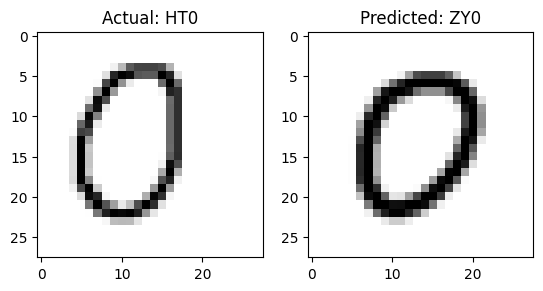

Actual member: YJ, Actual digit: 2, Predicted member: CY, Predicted digit: 2


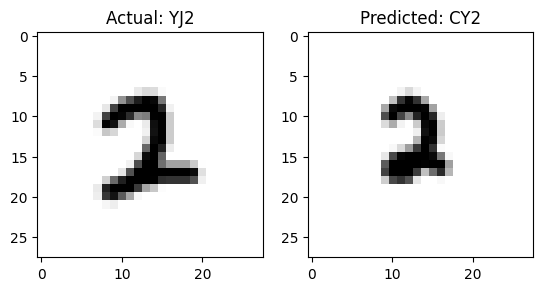

Actual member: HT, Actual digit: 2, Predicted member: YO, Predicted digit: 2


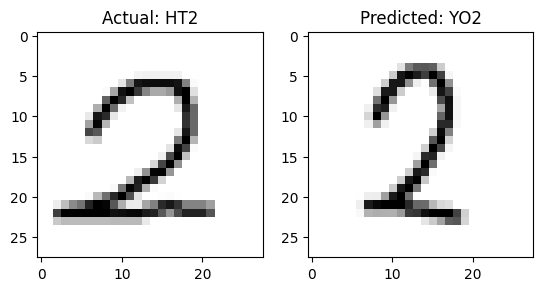

Actual member: YJ, Actual digit: 3, Predicted member: CY, Predicted digit: 3


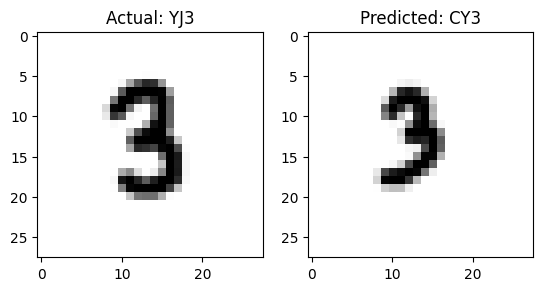

Actual member: YJ, Actual digit: 4, Predicted member: CY, Predicted digit: 4


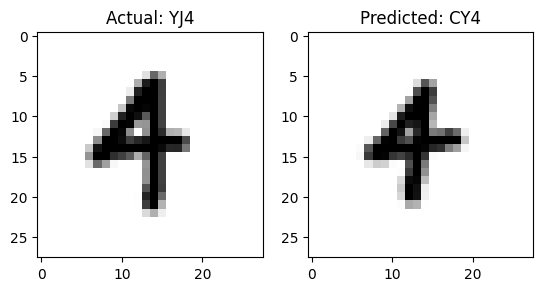

Actual member: YJ, Actual digit: 7, Predicted member: CY, Predicted digit: 7


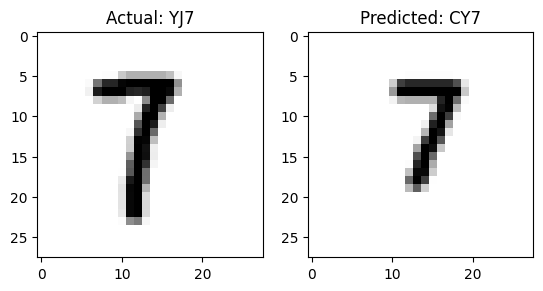

Actual member: CY, Actual digit: 7, Predicted member: YJ, Predicted digit: 7


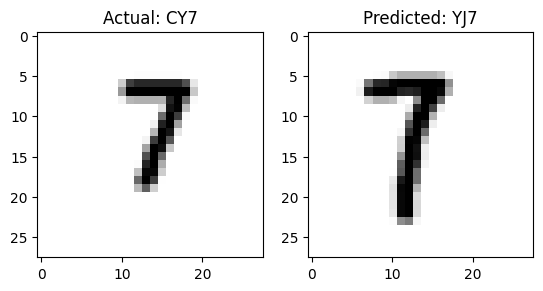

Actual member: YJ, Actual digit: 8, Predicted member: CY, Predicted digit: 8


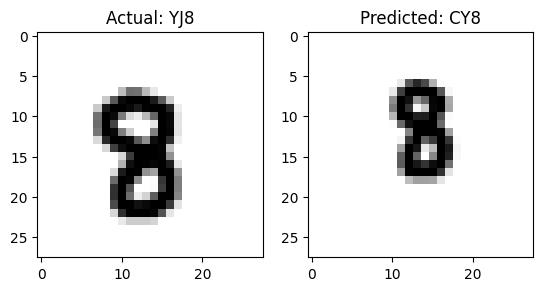

In [ ]:
# Print out the errors
for error in member_error_list:
  print(f"Actual member: {error['actual_member']}, Actual digit: {error['actual_digit']}, Predicted member: {error['predicted_member']}, Predicted digit: {error['predicted_digit']}")

  actual_image = None
  predicted_image = None

  # When the filename matches the error entry, find the image from loaded_images that corresponds to it
  for i in range(len(filename_list)):
    for j in range(len(filename_list[i])):
      if filename_list[i][j] == f"{error['actual_member']}_{error['actual_digit']}_resized.png":
        actual_image = loaded_images[i][j]
      if filename_list[i][j] == f"{error['predicted_member']}_{error['actual_digit']}_resized.png":  # Notice we use 'actual_digit' here
        predicted_image = loaded_images[i][j]

  # Only proceed if both actual and predicted images are found
  if actual_image is not None and predicted_image is not None:
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(actual_image)
    axes[0].set_title(f"Actual: {error['actual_member']}{error['actual_digit']}")
    axes[1].imshow(predicted_image)
    axes[1].set_title(f"Predicted: {error['predicted_member']}{error['actual_digit']}")
    plt.show()

The result shows that YJ has the highest number of incorrect identified handwritten digits, which is at 5. Meanwhile, HT has 2 errors and CY has 1 error. ZY and YO have the highest accuracy probably due to their consistent handwriting

# **Get Explainer for Each CNN models on Recognizing Owner**

SHAP images for 10 CNN models will be plotted to get insights on how each model able to recognize the owner of handwritten digits

In [ ]:
!pip install shap

In [ ]:
# Import libraries
import glob
from PIL import Image
import shap
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


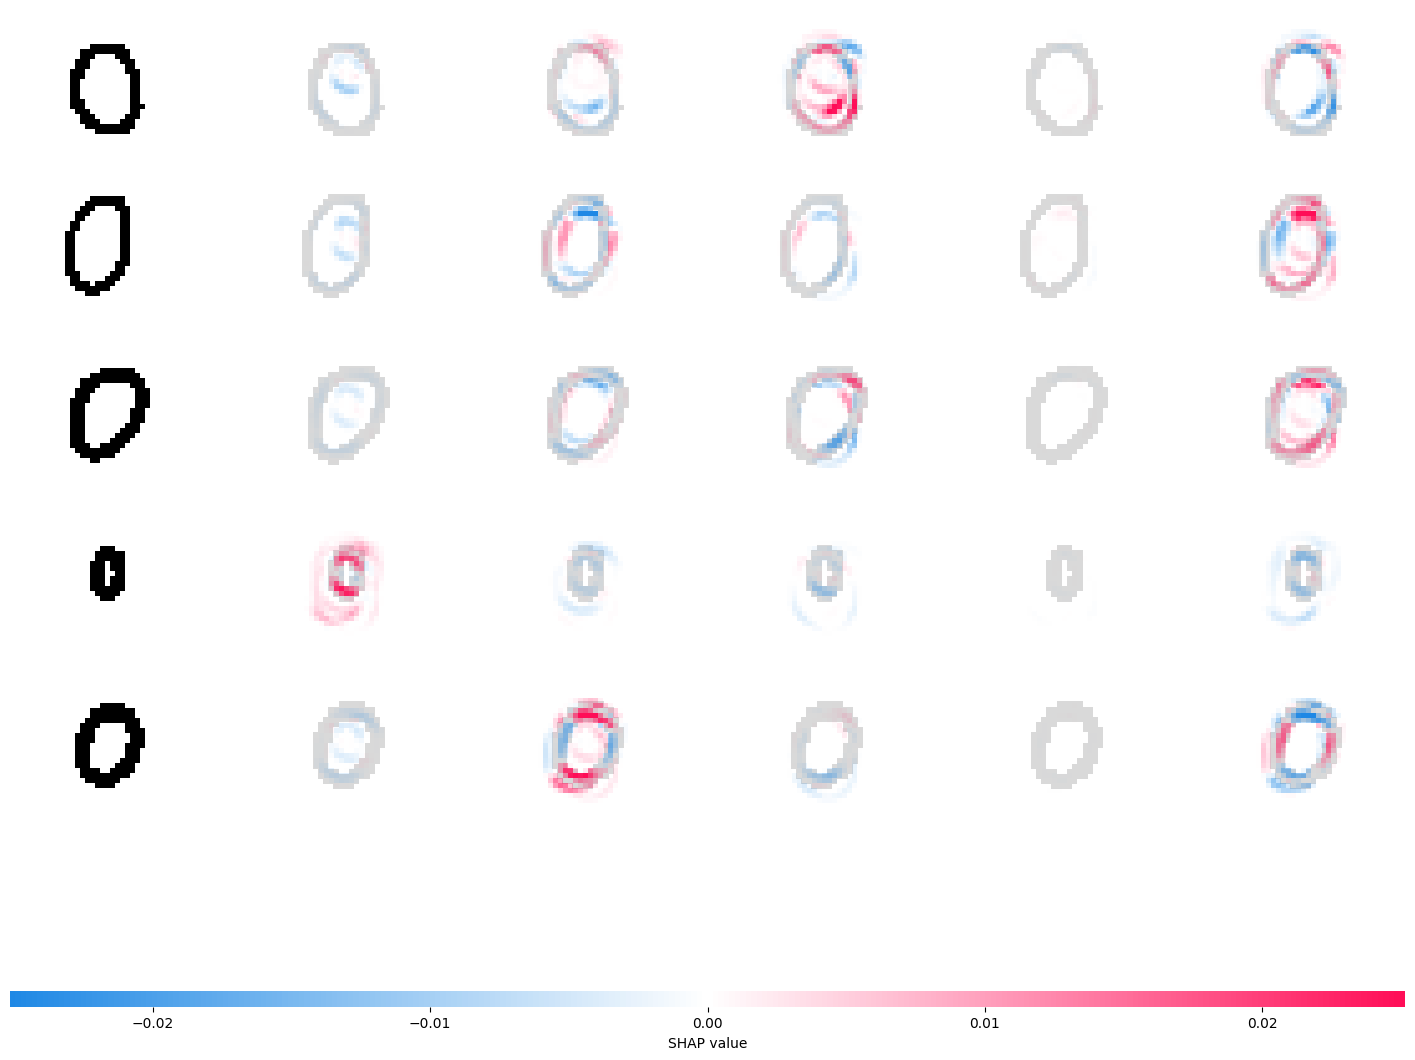

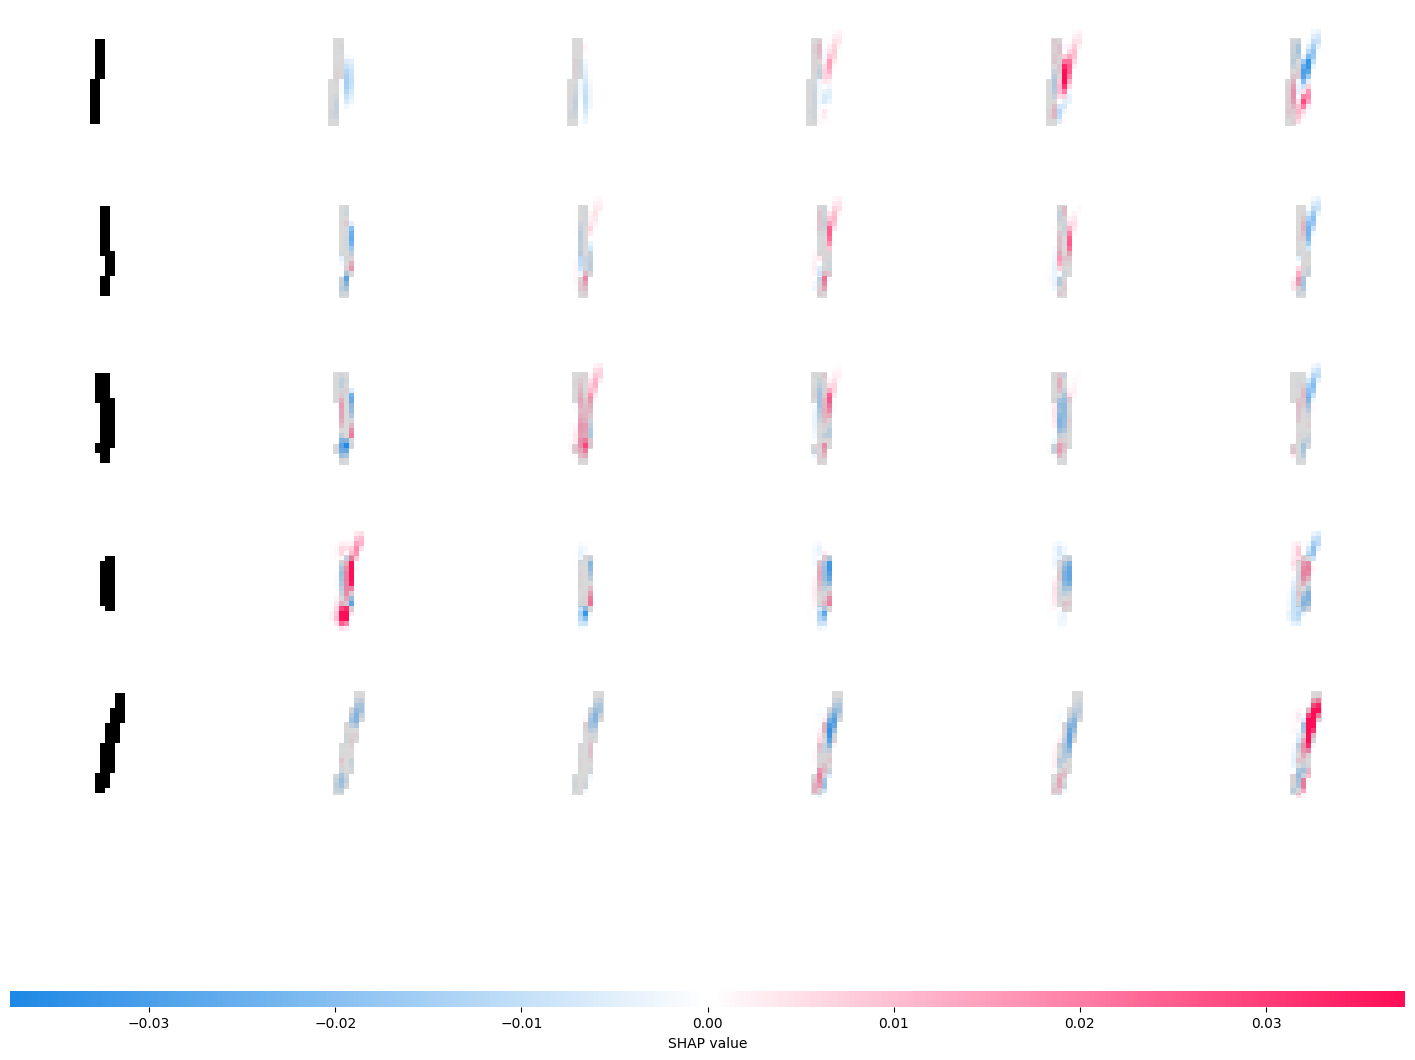

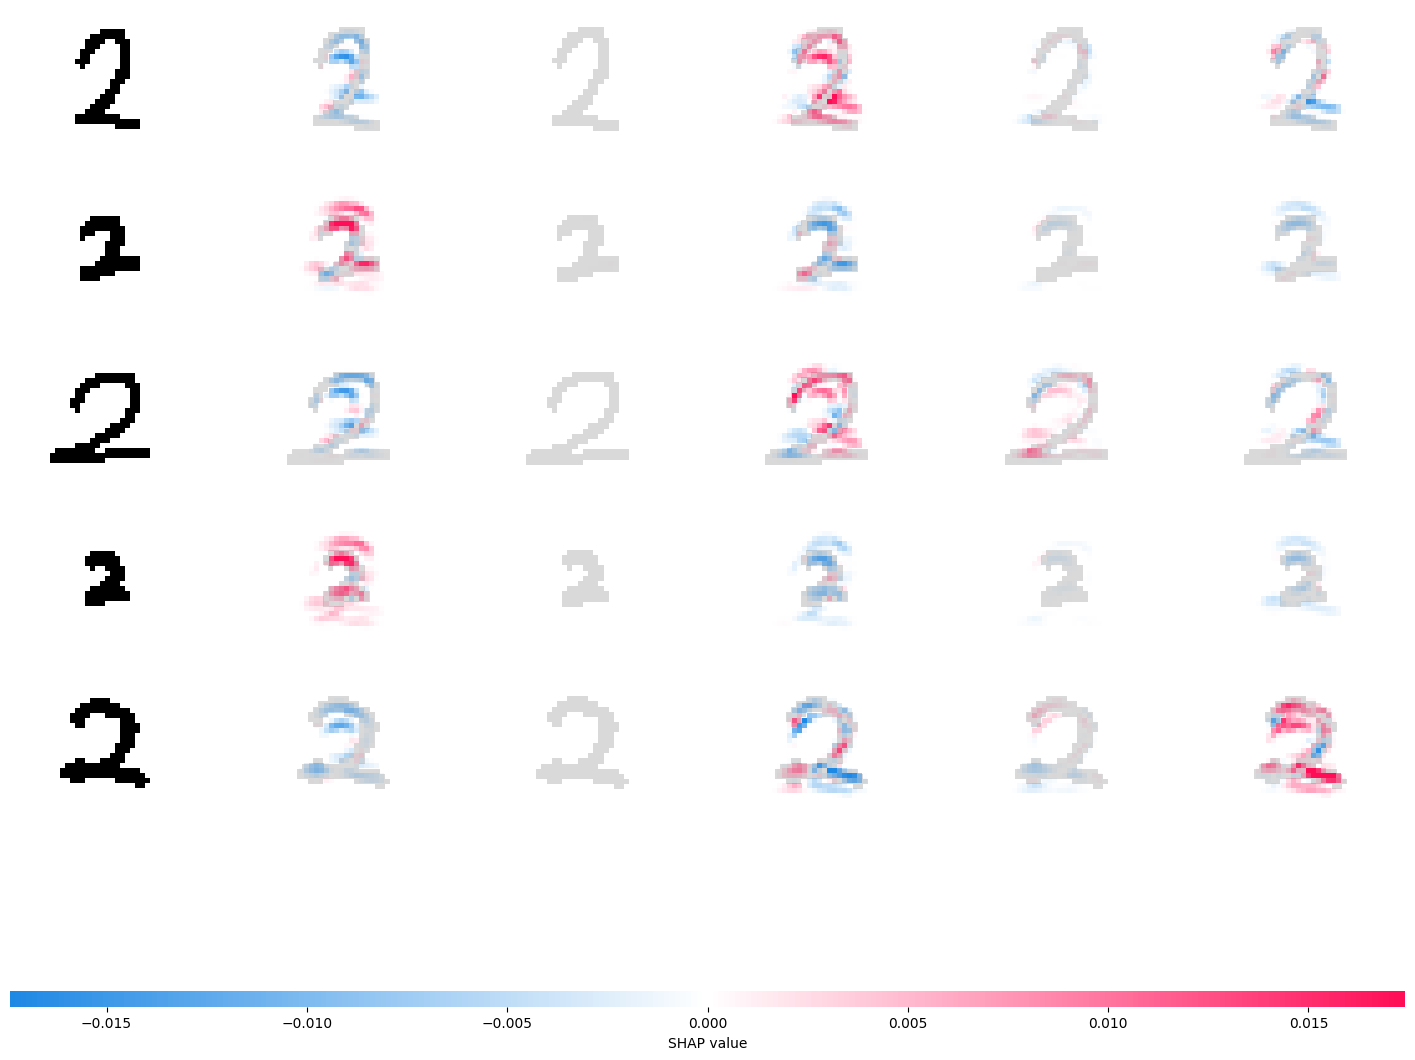

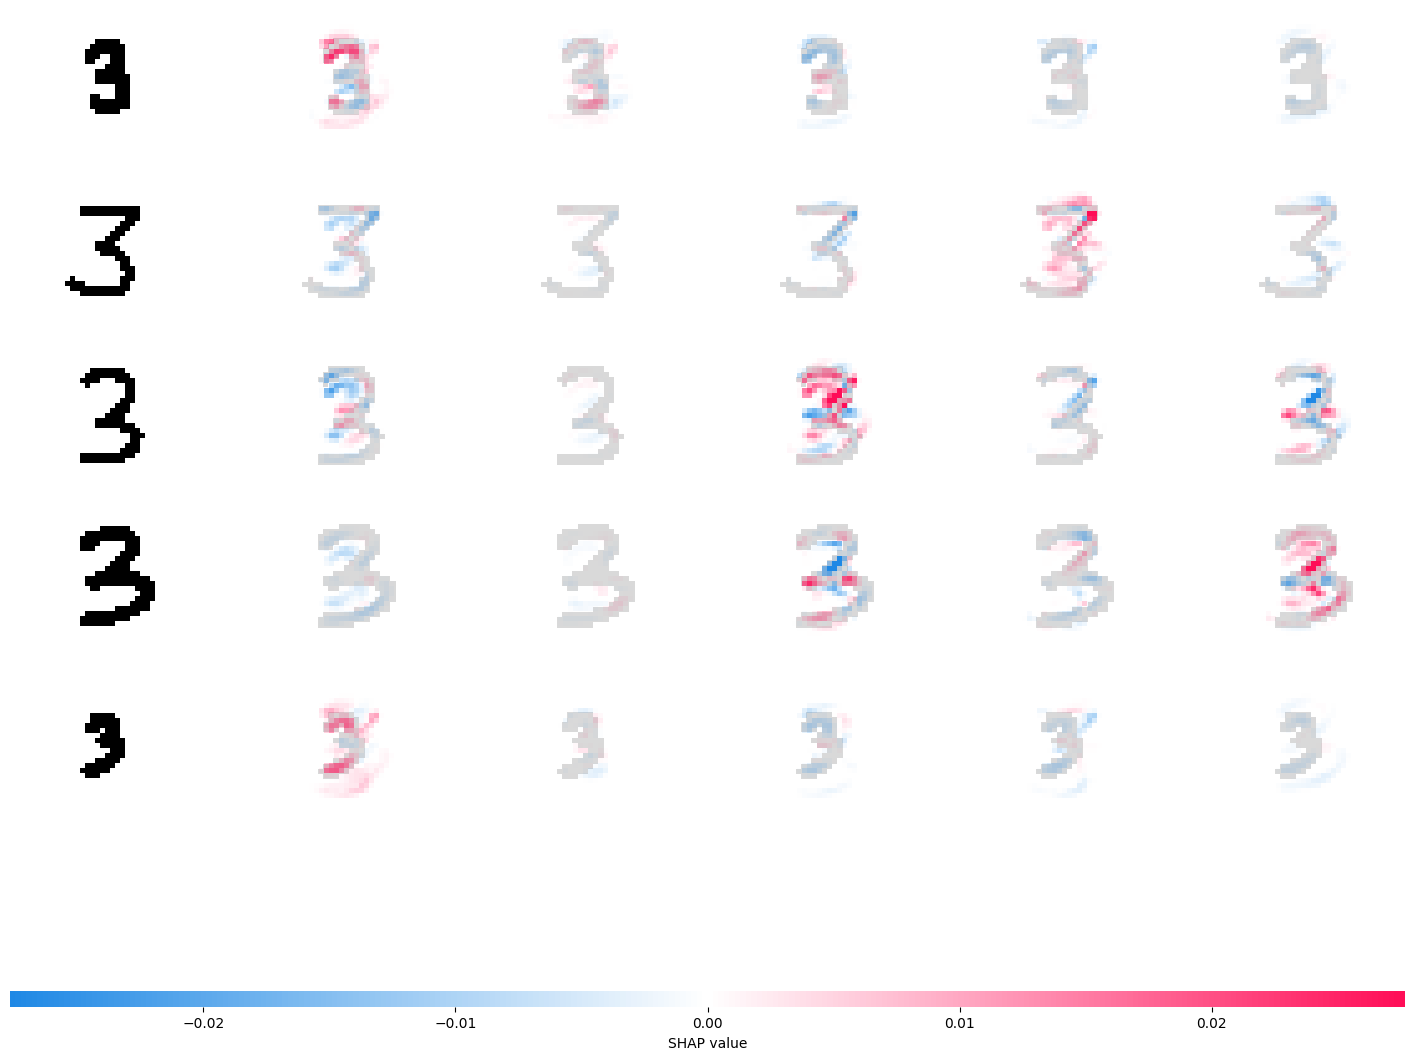

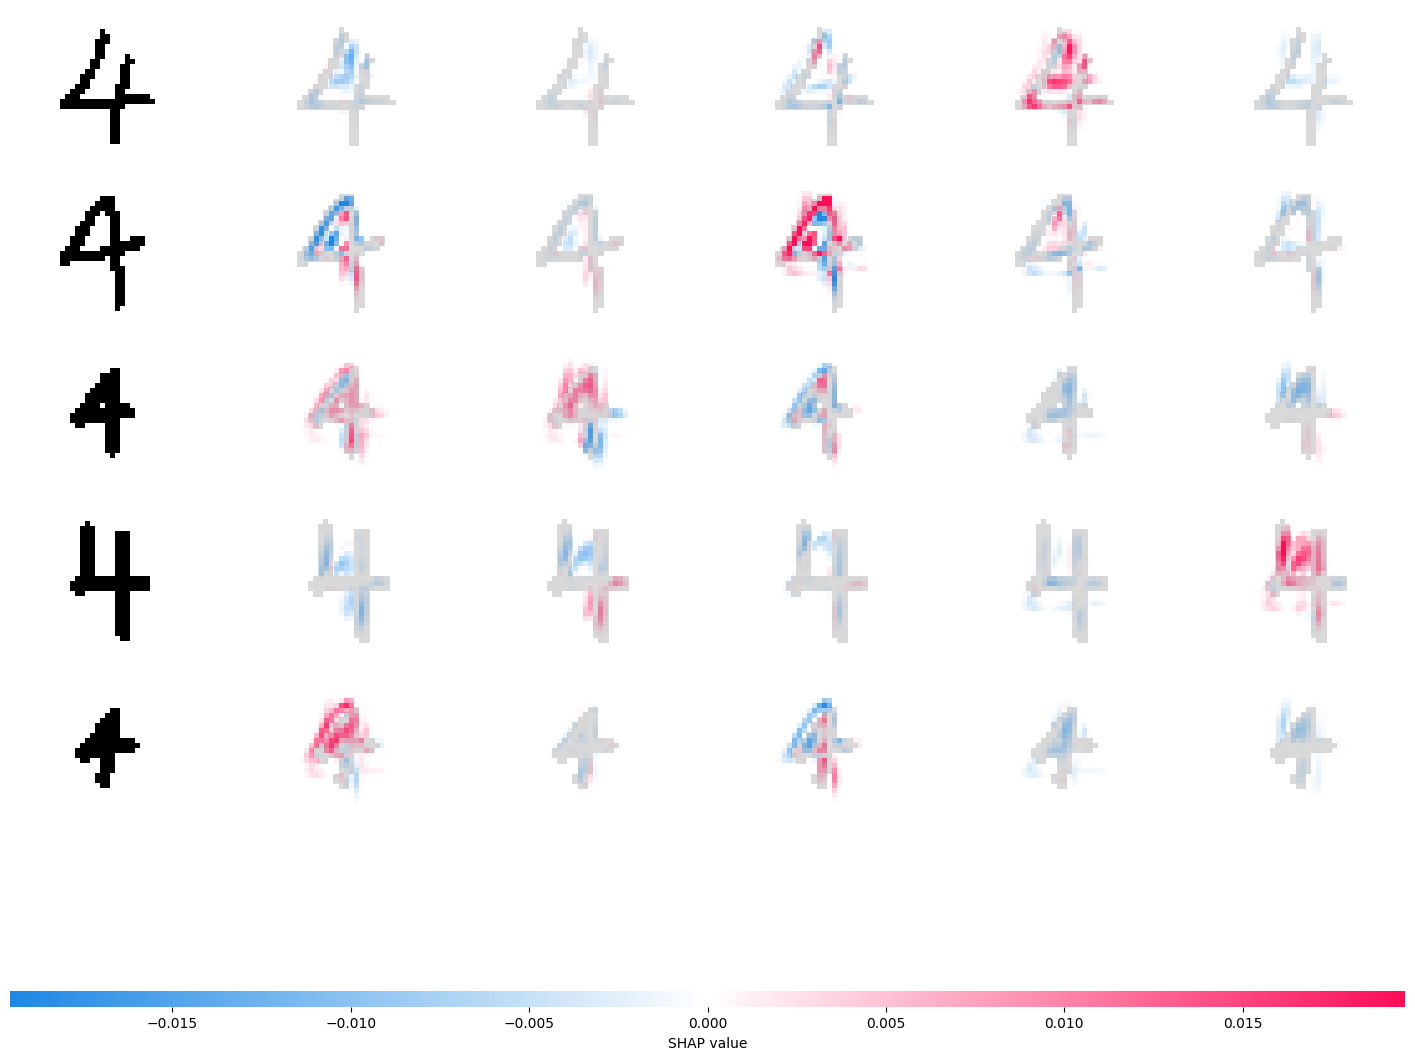

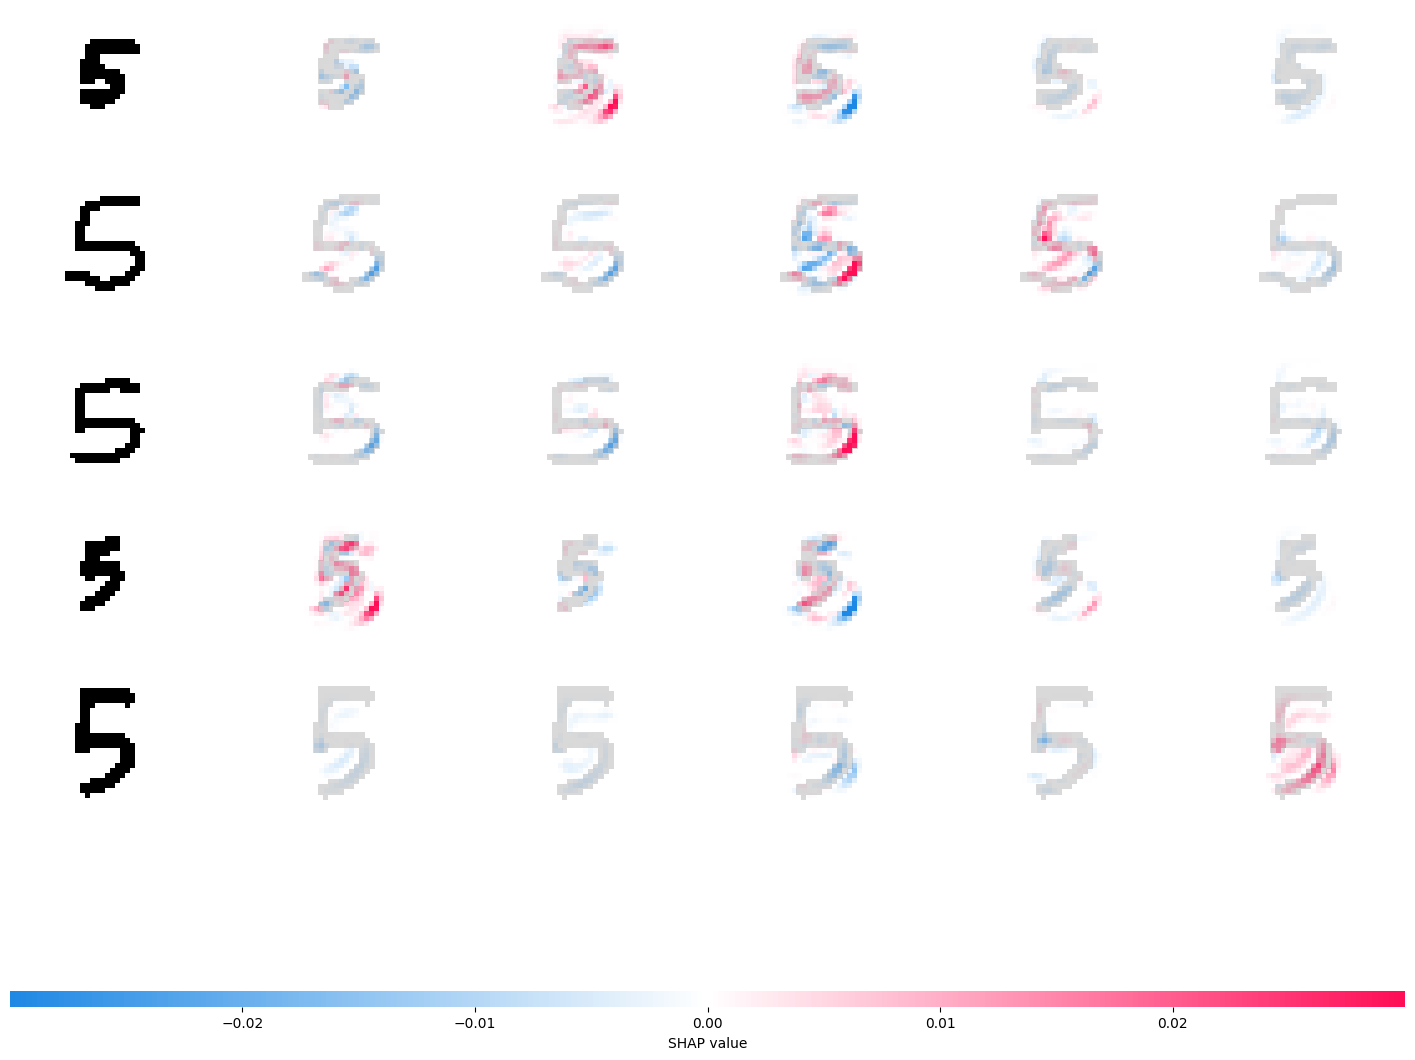

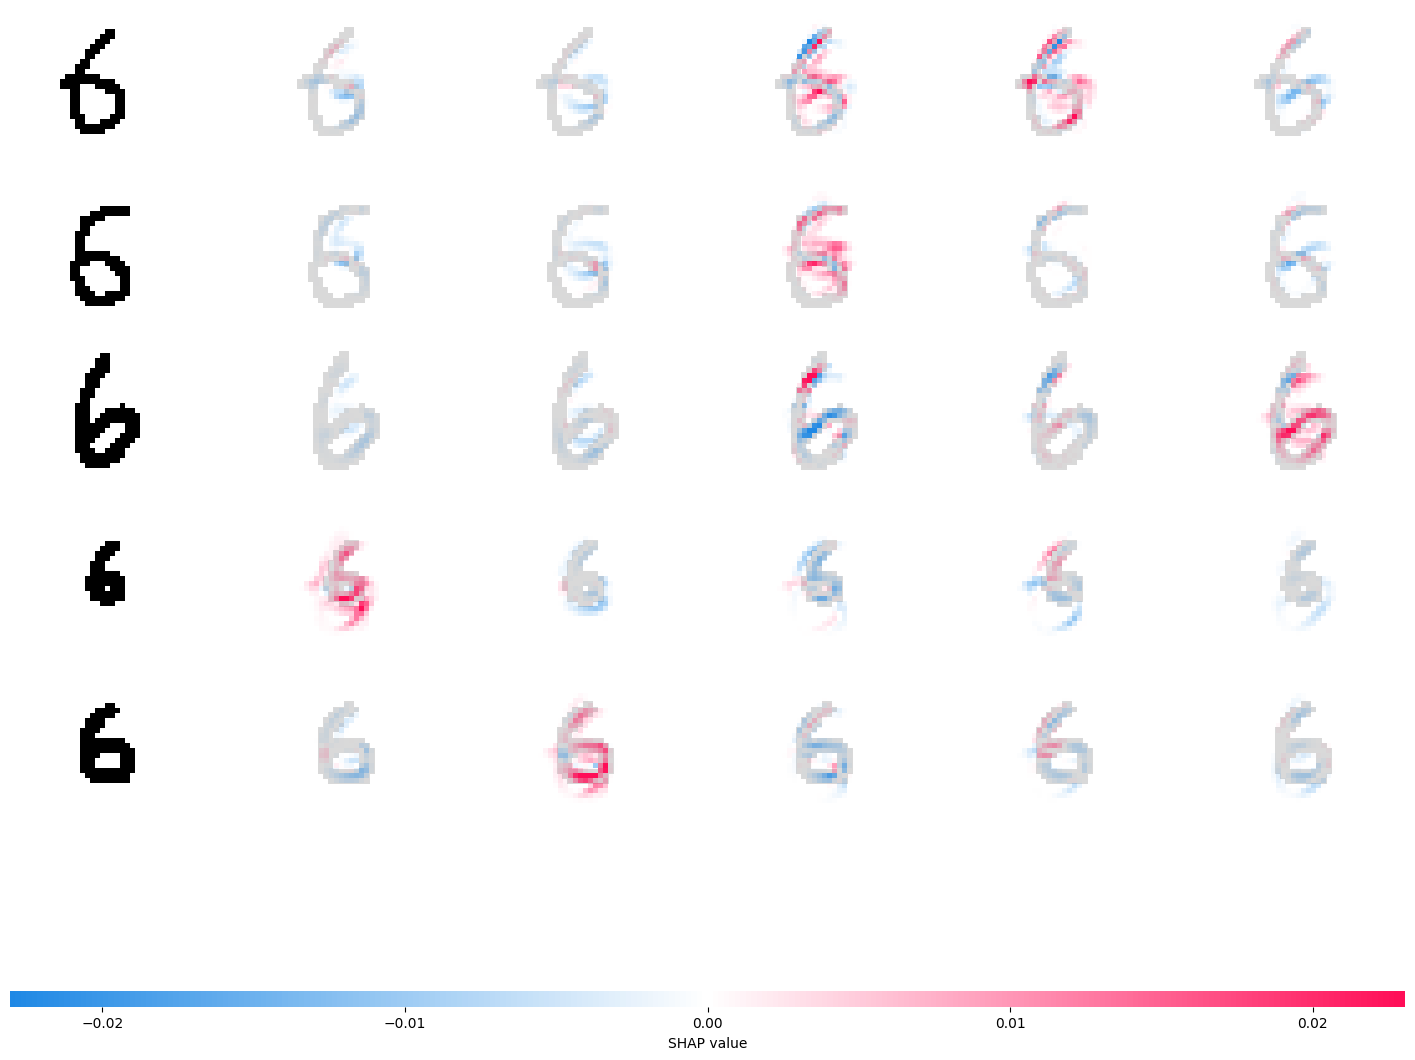

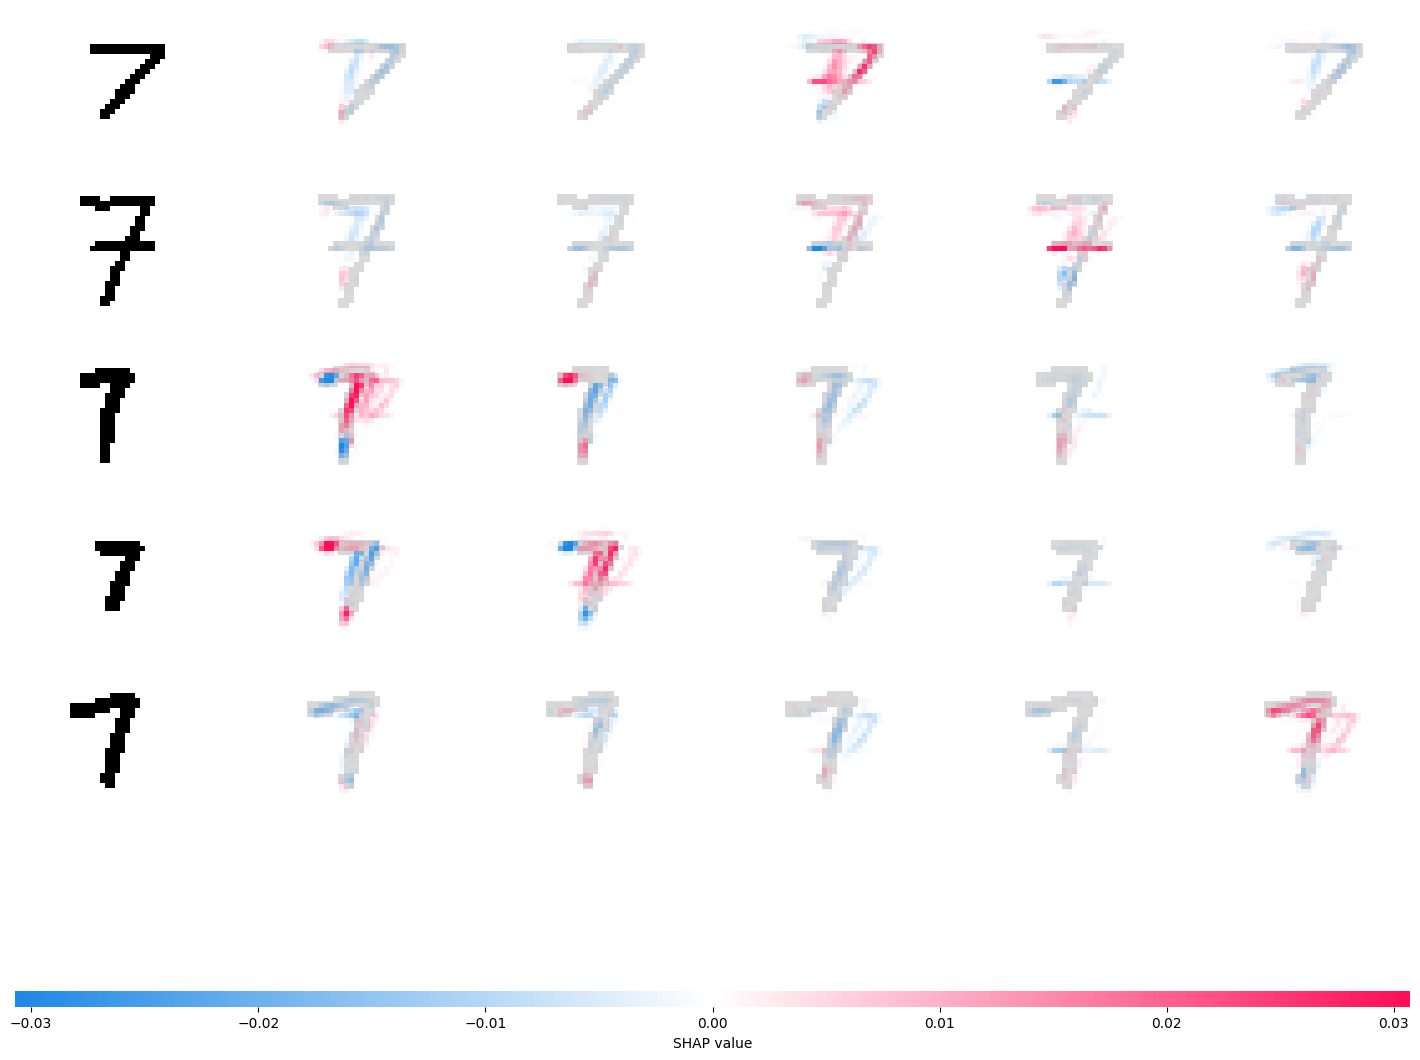

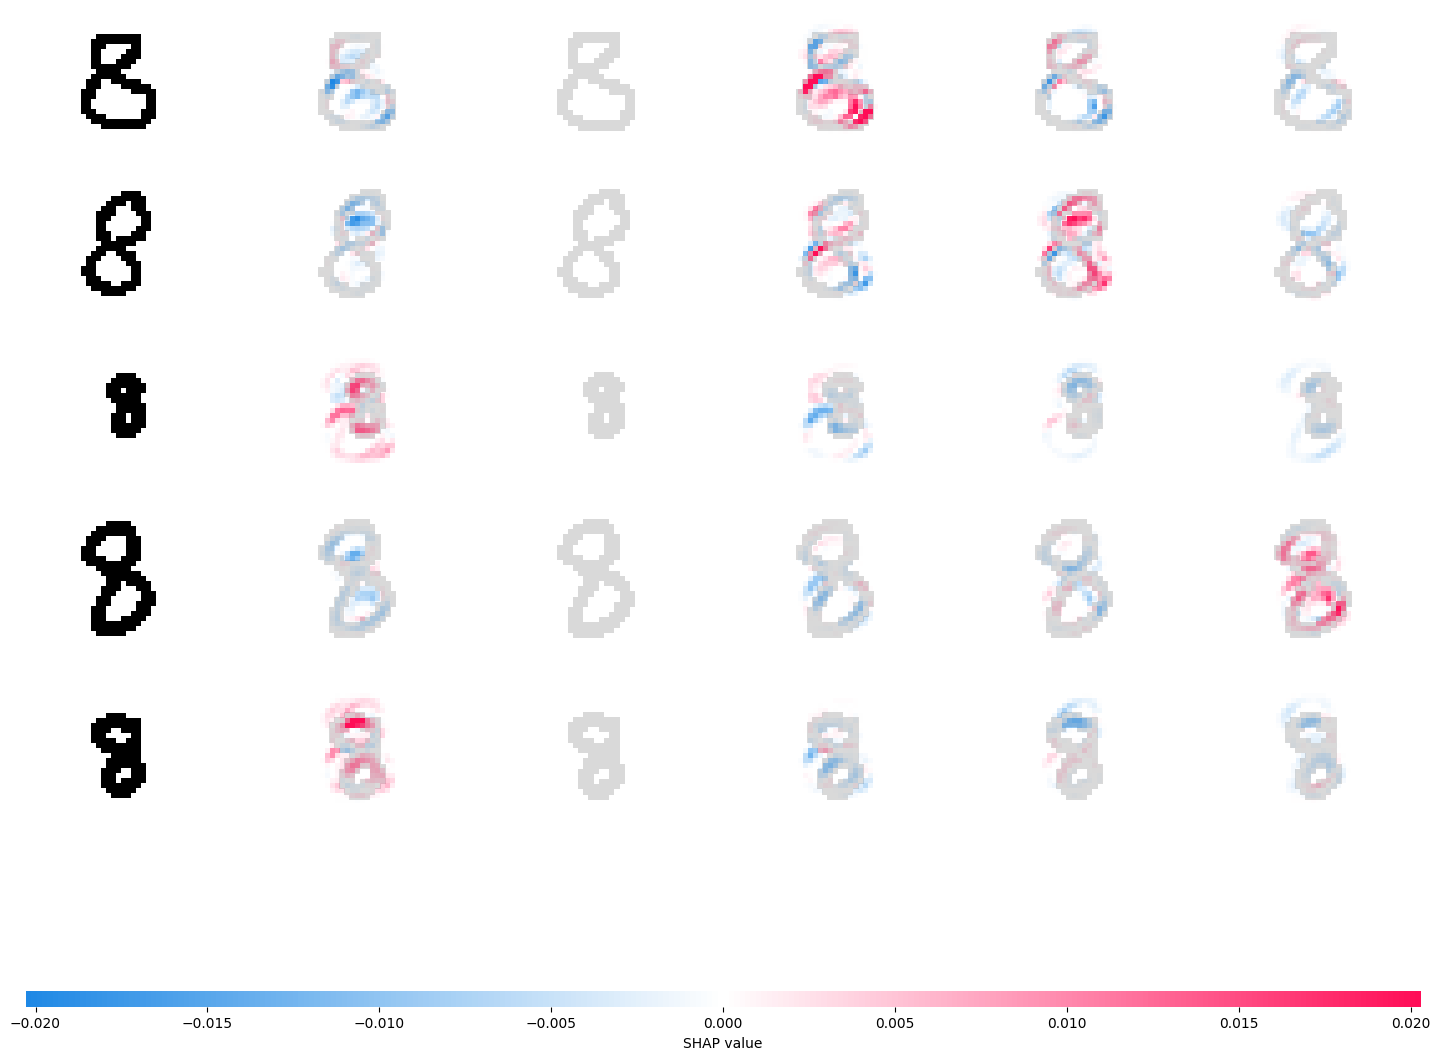

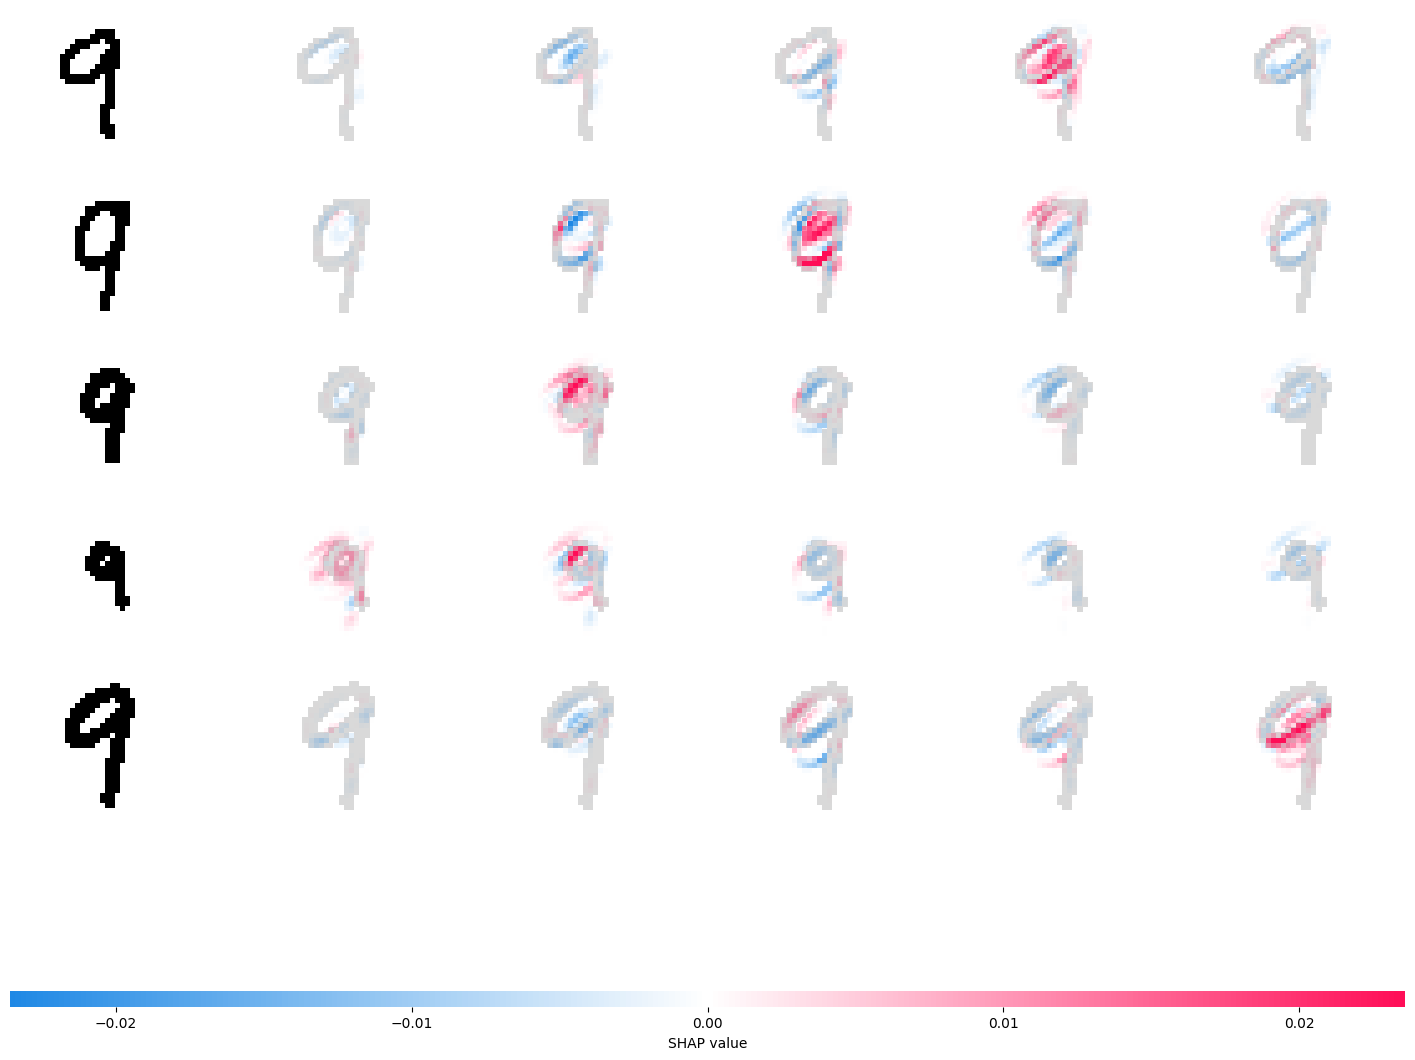

In [ ]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    if img.shape[2] == 4:  # If the image has 4 channels
        img = img[:, :, :3]  # Discard the alpha channel
    img = img / 255.0  # Normalize

    # Use PIL for binarization
    threshold = 215
    img_pil = Image.fromarray((img * 255).astype(np.uint8))  # Convert to PIL Image
    img_bin = img_pil.convert("L").point(lambda x: 0 if x < threshold else 255, mode="1")
    img_bin = np.array(img_bin, dtype=np.float32) # Convert to array and normalize
    img_bin = 1 - img_bin  # Invert binary image

    # Add batch dimension
    img = np.expand_dims(img, 0)
    img_bin = np.expand_dims(img_bin, -1)  # Add channel dimension
    return img, img_bin

# Initialize lists to store SHAP values and representative images for each model
shap_values_list = []
representative_images_list = []

# Calculate SHAP values for each image for each class using each model
for i, model in enumerate(handwriting_model_list):
    # Load one image per class from each class folder
    image_paths = glob.glob(f'{testing_dir}/{i}/*_resized.png')

    representative_samples = []
    representative_images = []

    for path in image_paths:
        img, img_bin = load_and_preprocess_image(path)
        representative_samples.append(img)
        representative_images.append(img_bin)

    # Convert to Tensor for compatibility with SHAP
    to_explain = tf.convert_to_tensor(np.concatenate(representative_samples))

    # Create an explainer object for the current model
    explainer = shap.DeepExplainer(model, to_explain)

    # Calculate SHAP values using the explainer
    shap_values = explainer.shap_values(to_explain)

    # Store the SHAP values and representative images for this model
    shap_values_list.append(shap_values)
    representative_images_list.append(representative_images)

# Now we have the SHAP values and representative images for each model, we can plot them
for i in range(10):
    shap.image_plot(shap_values_list[i], -np.array(representative_images_list[i]))